In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
df = pd.read_csv('full_data.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

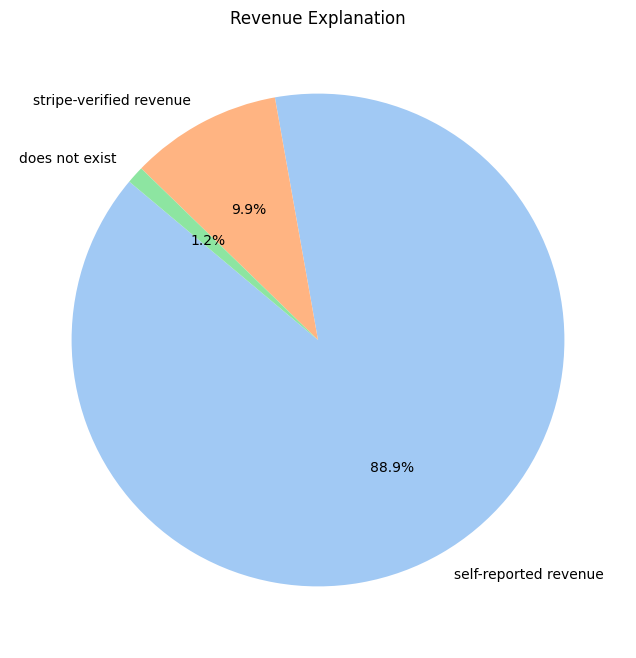

In [4]:
# Count the occurrences of each unique value
counts = df['revenue_explanation'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Revenue Explanation')
plt.show()

In [5]:
def convert_to_numeric(value):
    try:
        return int(value.replace('$', '').replace(',', ''))
    except (ValueError, AttributeError):
        return None

df["revenue_int"] = df['revenue'].apply(convert_to_numeric)

In [6]:
print("Total Startups on IH:",len(df))
print("Startups earning < 0$/month:",len(df[df["revenue_int"] < 0]))
print("Startups earning 0$/month:",len(df[df["revenue_int"] == 0]))
print("Startups earning $NA/month:", len(df[df["revenue_int"].isna()]))

print("Startups earning > 0$/month:",len(df[df["revenue_int"] > 0]))
print("Startups earning >= 100$/month:",len(df[df["revenue_int"] >= 100]))
print("Startups earning  >= 1000$/month:",len(df[df["revenue_int"] >= 1000]))
print("Startups earning >= 10000$/month:",len(df[df["revenue_int"] >= 10000]))

Total Startups on IH: 2868
Startups earning < 0$/month: 36
Startups earning 0$/month: 1516
Startups earning $NA/month: 33
Startups earning > 0$/month: 1283
Startups earning >= 100$/month: 1186
Startups earning  >= 1000$/month: 1088
Startups earning >= 10000$/month: 915


In [7]:
(1516+33)/2868

0.5400976290097629

In [8]:
915/2868

0.3190376569037657

In [9]:
915/30000

0.0305

In [10]:
df2 = df[df['revenue_explanation'] == 'stripe-verified revenue']
len(df2)

285

In [11]:
print("Total Stripe Verified Startups on IH:",len(df2))
print("Stripe Verified Startups earning < 0$/month:",len(df2[df2["revenue_int"] < 0]))
print("Stripe Verified Startups earning 0$/month:",len(df2[df2["revenue_int"] == 0]))
print("Stripe Verified Startups earning $NA/month:", len(df2[df2["revenue_int"].isna()]))

print("Stripe Verified Startups earning > 0$/month:",len(df2[df2["revenue_int"] > 0]))
print("Stripe Verified Startups earning >= 100$/month:",len(df2[df2["revenue_int"] >= 100]))
print("Stripe Verified Startups earning  >= 1000$/month:",len(df2[df2["revenue_int"] >= 1000]))
print("Stripe Verified Startups earning >= 10000$/month:",len(df2[df2["revenue_int"] >= 10000]))

Total Stripe Verified Startups on IH: 285
Stripe Verified Startups earning < 0$/month: 3
Stripe Verified Startups earning 0$/month: 118
Stripe Verified Startups earning $NA/month: 0
Stripe Verified Startups earning > 0$/month: 164
Stripe Verified Startups earning >= 100$/month: 136
Stripe Verified Startups earning  >= 1000$/month: 111
Stripe Verified Startups earning >= 10000$/month: 74


In [12]:
111/285

0.3894736842105263

In [13]:
74/285

0.2596491228070175

In [14]:
247/285

0.8666666666666667

In [15]:
df3 = df[df['revenue_explanation'] == 'self-reported revenue']
len(df3)
print("Total Self Reported Startups on IH:",len(df3))
print("Self Reported Startups earning < 0$/month:",len(df3[df3["revenue_int"] < 0]))
print("Self Reported Startups earning 0$/month:",len(df3[df3["revenue_int"] == 0]))
print("Self Reported Startups earning $NA/month:", len(df3[df3["revenue_int"].isna()]))

print("Self Reported Startups earning > 0$/month:",len(df3[df3["revenue_int"] > 0]))
print("Self Reported Startups earning >= 100$/month:",len(df3[df3["revenue_int"] >= 100]))
print("Self Reported Startups earning  >= 1000$/month:",len(df3[df3["revenue_int"] >= 1000]))
print("Self Reported Startups earning >= 10000$/month:",len(df3[df3["revenue_int"] >= 10000]))

Total Self Reported Startups on IH: 2550
Self Reported Startups earning < 0$/month: 33
Self Reported Startups earning 0$/month: 1398
Self Reported Startups earning $NA/month: 0
Self Reported Startups earning > 0$/month: 1119
Self Reported Startups earning >= 100$/month: 1050
Self Reported Startups earning  >= 1000$/month: 977
Self Reported Startups earning >= 10000$/month: 841


In [16]:
977/2550

0.38313725490196077

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Assuming you have a DataFrame called df with a column 'about'
# Load your dataset (replace 'df.csv' with your actual file path or DataFrame)
# df = pd.read_csv('df.csv')

# Combine all 'about' sections into a single string
about_text = ' '.join(df['tagline'].fillna(''))

# Tokenization
tokens = [word.lower() for word in word_tokenize(about_text)]

# Remove punctuation
tokens = [word for word in tokens if word.isalnum()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Frequency Count
word_freq = Counter(tokens)

# Get the top 10 keywords
top_keywords = word_freq.most_common(100)

print(top_keywords)

[('ai', 163), ('platform', 141), ('app', 128), ('tool', 114), ('online', 113), ('software', 91), ('website', 84), ('service', 74), ('build', 73), ('management', 73), ('web', 73), ('design', 72), ('wordpress', 68), ('data', 67), ('marketing', 66), ('create', 65), ('simple', 64), ('find', 64), ('business', 63), ('content', 63), ('saas', 59), ('get', 58), ('free', 58), ('social', 55), ('digital', 53), ('email', 53), ('video', 52), ('best', 50), ('product', 49), ('tools', 48), ('analytics', 45), ('job', 45), ('one', 44), ('apps', 42), ('way', 42), ('help', 40), ('code', 39), ('easy', 37), ('community', 37), ('videos', 37), ('feedback', 37), ('people', 36), ('based', 36), ('newsletter', 35), ('work', 35), ('time', 35), ('monitoring', 33), ('tech', 32), ('developers', 32), ('world', 31), ('builder', 31), ('api', 31), ('make', 30), ('media', 30), ('remote', 30), ('google', 30), ('websites', 29), ('subscription', 29), ('without', 29), ('startups', 29), ('teams', 28), ('businesses', 28), ('usin

In [18]:
df4 = df[df["revenue_int"] >= 10000]

# Combine all 'about' sections into a single string
about_text = ' '.join(df4['tagline'].fillna(''))

# Tokenization
tokens = [word.lower() for word in word_tokenize(about_text)]

# Remove punctuation
tokens = [word for word in tokens if word.isalnum()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Frequency Count
word_freq2 = Counter(tokens)

# Get the top 10 keywords
top_keywords = word_freq2.most_common(100)

print(top_keywords)

[('platform', 64), ('software', 61), ('online', 52), ('marketing', 39), ('service', 39), ('design', 33), ('digital', 31), ('app', 31), ('business', 30), ('build', 30), ('wordpress', 30), ('management', 28), ('tool', 28), ('website', 27), ('data', 24), ('saas', 23), ('content', 23), ('social', 20), ('product', 19), ('get', 18), ('free', 18), ('ai', 18), ('create', 17), ('email', 16), ('apps', 16), ('media', 16), ('video', 16), ('simple', 16), ('businesses', 16), ('way', 15), ('web', 15), ('one', 15), ('tech', 15), ('help', 15), ('best', 15), ('automation', 14), ('teams', 14), ('easy', 14), ('tools', 14), ('builder', 14), ('sales', 13), ('seo', 13), ('developers', 13), ('agency', 13), ('without', 13), ('subscription', 12), ('companies', 12), ('unlimited', 12), ('analytics', 12), ('products', 11), ('work', 11), ('startup', 11), ('tracking', 11), ('solution', 11), ('code', 11), ('time', 11), ('job', 11), ('marketplace', 10), ('make', 10), ('people', 10), ('services', 10), ('api', 10), ('re

In [33]:
df.head(50)

,link,revenue,revenue_period,revenue_explanation,title,tagline,revenue_inner_page,site_link,tags,founder_links,scraped,about,twitter,visitors,founders,revenue_int
0,https://www.indiehackers.com/product/nextiva,"$10,000,000",month,self-reported revenue,Nextiva,Everything a business needs to communicate,$10MM/mo,https://www.nextiva.com/,"['1,000+ Employees', 'Multiple Founders', ""Fou...",{'https://www.indiehackers.com/TomasGorny?id=S...,True,\nEmpowering businesses with access to essenti...,https://twitter.com/nextiva,No Data,['Tomas Gorny'],10000000.0
1,https://www.indiehackers.com/product/envato,"$8,000,000",month,self-reported revenue,Envato,A platform for getting creative projects done,$8MM/mo,http://envato.com/,"['500+ Employees', 'Multiple Founders', 'Found...",{'https://www.indiehackers.com/collis?id=SlAIs...,True,\nEnvato helps creatives earn a living online ...,https://twitter.com/envato,No Data,"[""Collis Ta'eed""]",8000000.0
2,https://www.indiehackers.com/product/boom-bucket,"$5,500,000",month,self-reported revenue,BOOM & BUCKET,Most Trusted Used Equipment Marketplace for Bu...,$5.5MM/mo,https://www.boomandbucket.com/,"['10+ Employees', 'Multiple Founders', ""Founde...",{'https://www.indiehackers.com/BOOMANDBUCKET?i...,True,\nBoom & Bucket is changing the way people buy...,https://twitter.com/boomandbucket,No Data,['BOOMANDBUCKET'],5500000.0
3,https://www.indiehackers.com/product/signum-ai-2,"$4,000,000",month,self-reported revenue,Signum.ai,Digital ad campaigns automation,$4MM/mo,https://signum.ai/,"['10+ Employees', ""Founders Don't Code"", 'Solo...",{'https://www.indiehackers.com/SignumAI?id=LNy...,True,"\nWe develop AI-driven marketing tools, includ...",No Data,No Data,['SignumAI'],4000000.0
4,https://www.indiehackers.com/product/grasshopper,"$2,500,000",month,self-reported revenue,Grasshopper,Virtual Phone for Entrepreneurs,$2.5MM/mo,http://grasshopper.com/,"['10+ Employees', 'Multiple Founders', ""Founde...",{'https://www.indiehackers.com/DavidHauser?id=...,True,No data,No Data,No Data,['David Hauser'],2500000.0
5,https://www.indiehackers.com/product/jaswig,"$2,000,000",month,self-reported revenue,Jaswig - Fully,Wooden standing desk - Ergonomic furniture,$2MM/mo,http://www.jaswig.com/,"['10+ Employees', 'Multiple Founders', ""Founde...",{'https://www.indiehackers.com/JohnGaleyn?id=q...,True,"\nWe didn't find beautiful, sustainable and af...",No Data,No Data,"['Samuel Rieder', 'John-Morgan Galeyn']",2000000.0
6,https://www.indiehackers.com/product/justcall,"$1,600,000",month,self-reported revenue,JustCall,Cloud phone system for sales & support teams,$1.6MM/mo,https://justcall.io/,"['50+ Employees', 'Founders Code', 'Solo Found...",{'https://www.indiehackers.com/gaufire?id=tjrj...,True,\nI created JustCall because I'm bigtime bulli...,No Data,No Data,['gaufire'],1600000.0
7,https://www.indiehackers.com/product/convertkit,"$1,426,586",month,self-reported revenue,ConvertKit,Email Marketing for Bloggers,$1.43MM/mo,https://convertkit.com/,"['10+ Employees', ""Founders Don't Code"", 'Solo...",{'https://www.indiehackers.com/NathanBarry?id=...,True,No data,No Data,No Data,['Nathan Barry'],1426586.0
8,https://www.indiehackers.com/product/mfino-pre...,"$1,416,666",month,self-reported revenue,mFino Premium Fintech Solution,"Fintech Digital Transformation, Banking & Paym...",$1.42MM/mo,http://mfino.com/,"['50+ Employees', ""Founders Don't Code"", 'Solo...",{'https://www.indiehackers.com/SridharObiliset...,True,\nmFino has a broad range of microservices for...,https://twitter.com/mfinoinc,No Data,['Sridhar Obilisetty'],1416666.0
9,https://www.indiehackers.com/product/newton-co,"$1,200,000",month,self-reported revenue,Newton.co,Buy and sell Bitcoin & Ethereum instantly.,$1.2MM/mo,https://newton.co/,"['10+ Employees', 'Multiple Founders', 'Founde...",{'https://www.indiehackers.com/andreeaidr?id=g...,True,\nNewton is crypto as it should be: with nativ...,https://twitter.com/newton_crypto,No Data,"['Nickolas Tsagatakis', 'Andree

In [19]:
word_freq_diff = word_freq - word_freq2
print(word_freq_diff.most_common(30))

[('ai', 145), ('app', 97), ('tool', 86), ('platform', 77), ('online', 61), ('web', 58), ('website', 57), ('find', 54), ('simple', 48), ('create', 48), ('management', 45), ('build', 43), ('data', 43), ('get', 40), ('free', 40), ('content', 40), ('design', 39), ('wordpress', 38), ('email', 37), ('video', 36), ('saas', 36), ('social', 35), ('service', 35), ('best', 35), ('tools', 34), ('job', 34), ('business', 33), ('analytics', 33), ('videos', 33), ('newsletter', 31)]


In [20]:
print(word_freq_diff.most_common()[:-31:-1])

[('pieces', 1), ('90', 1), ('overflow', 1), ('swatches', 1), ('color', 1), ('organizing', 1), ('atheletes', 1), ('distracted', 1), ('uncovering', 1), ('trial', 1), ('infra', 1), ('reproducible', 1), ('betting', 1), ('tt', 1), ('toolbar', 1), ('folders', 1), ('middleman', 1), ('colle', 1), ('premier', 1), ('upform', 1), ('renting', 1), ('s3', 1), ('object', 1), ('fix', 1), ('mockup', 1), ('nice', 1), ('codeless', 1), ('tells', 1), ('uppora', 1), ('requirements', 1)]


In [23]:
import ast

solo_founder_count = 0
multiple_founders_count = 0
for tag_str in df['tags']:
    try:
        tag = ast.literal_eval(tag_str)
        #print(tag)
        if "Multiple Founders" in tag:
            multiple_founders_count = multiple_founders_count + 1
        elif "Solo Founder" in tag:
            solo_founder_count = solo_founder_count + 1
    except:
        print(tag_str)
    



print(f'Number of companies with Solo Founder: {solo_founder_count}')
print(f'Number of companies with Multiple Founders: {multiple_founders_count}')

nan
https://www.codemonk.ai/talent
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Number of companies with Solo Founder: 1836
Number of companies with Multiple Founders: 990


In [24]:
import ast

solo_founder_count = 0
multiple_founders_count = 0
for tag_str in df4['tags']:
    try:
        tag = ast.literal_eval(tag_str)
        #print(tag)
        if "Multiple Founders" in tag:
            multiple_founders_count = multiple_founders_count + 1
        elif "Solo Founder" in tag:
            solo_founder_count = solo_founder_count + 1
    except:
        print(tag_str)
    



print(f'Number of companies with Solo Founder: {solo_founder_count}')
print(f'Number of companies with Multiple Founders: {multiple_founders_count}')

nan
https://www.codemonk.ai/talent
nan
nan
nan
Number of companies with Solo Founder: 417
Number of companies with Multiple Founders: 492


In [25]:
import ast

solo_founder_count = 0
multiple_founders_count = 0
for tag_str in df['tags']:
    try:
        tag = ast.literal_eval(tag_str)
        #print(tag)
        if "Founders Don't Code" in tag:
            multiple_founders_count = multiple_founders_count + 1
        elif "Founders Code" in tag:
            solo_founder_count = solo_founder_count + 1
    except:
        print(tag_str)
    



print(f'Number of companies with Founders Code: {solo_founder_count}')
print(f'Number of companies with Founders Dont Code: {multiple_founders_count}')

nan
https://www.codemonk.ai/talent
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Number of companies with Founders Code: 2307
Number of companies with Founders Dont Code: 515


In [26]:
import ast

solo_founder_count = 0
multiple_founders_count = 0
for tag_str in df4['tags']:
    try:
        tag = ast.literal_eval(tag_str)
        #print(tag)
        if "Founders Don't Code" in tag:
            multiple_founders_count = multiple_founders_count + 1
        elif "Founders Code" in tag:
            solo_founder_count = solo_founder_count + 1
    except:
        print(tag_str)
    



print(f'Number of companies with Founders Code: {solo_founder_count}')
print(f'Number of companies with Founders Dont Code: {multiple_founders_count}')

nan
https://www.codemonk.ai/talent
nan
nan
nan
Number of companies with Founders Code: 638
Number of companies with Founders Dont Code: 267


In [27]:
import ast

about_text = ''
for tag_str in df['tags']:
    try:
        tags = ast.literal_eval(tag_str)
        for tag in tags:
            about_text = about_text + tag + " "
            
    except:
        print(tag_str)
    


tokens = [word.lower() for word in word_tokenize(about_text)]

# Remove punctuation
tokens = [word for word in tokens if word.isalnum()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]



words_to_remove = ["founders","employees","founder","code","solo", "multiple","10"]  # Add the words you want to remove

# Filter out words to remove from tokens
filtered_tokens = [token for token in tokens if token not in words_to_remove]

# Frequency Count
word_freq = Counter(filtered_tokens)

# Get the top 10 keywords
top_keywords = word_freq.most_common(100)
print(top_keywords)

nan
https://www.codemonk.ai/talent
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
[('saas', 1185), ('b2b', 937), ('productivity', 735), ('marketing', 703), ('b2c', 567), ('ai', 478), ('content', 413), ('community', 364), ('communication', 358), ('programming', 354), ('utilities', 349), ('growth', 330), ('analytics', 309), ('education', 309), ('apis', 277), ('design', 273), ('advertising', 245), ('social', 231), ('media', 231), ('services', 230), ('writing', 217), ('sales', 202), ('email', 188), ('marketplaces', 183), ('open', 182), ('source', 182), ('task', 173), ('management', 173), ('wordpress', 173), ('financial', 155), ('jobs', 130), ('hiring', 130), ('health', 128), ('fitness', 128), ('bots', 118), ('mailing', 105), ('lists', 105), ('video', 103), ('travel', 98), ('data', 98), ('payments', 87), ('shopping', 86), ('music', 86), ('audio', 86), ('gaming', 78), ('news', 76), ('magazine

In [75]:
import ast

about_text = ''
for tag_str in df4['tags']:
    try:
        tags = ast.literal_eval(tag_str)
        for tag in tags:
            about_text = about_text + tag + " "
            
    except:
        print(tag_str)
    


tokens = [word.lower() for word in word_tokenize(about_text)]

# Remove punctuation
tokens = [word for word in tokens if word.isalnum()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]



words_to_remove = ["founders","employees","founder","code","solo", "multiple","10"]  # Add the words you want to remove

# Filter out words to remove from tokens
filtered_tokens = [token for token in tokens if token not in words_to_remove]

# Frequency Count
word_freq = Counter(filtered_tokens)

# Get the top 10 keywords
top_keywords = word_freq.most_common(100)
print(top_keywords)

nan
https://www.codemonk.ai/talent
nan
nan
nan
[('b2b', 461), ('saas', 438), ('marketing', 328), ('b2c', 236), ('productivity', 196), ('communication', 128), ('growth', 127), ('programming', 122), ('content', 121), ('advertising', 111), ('ai', 110), ('analytics', 108), ('design', 107), ('apis', 105), ('sales', 102), ('marketplaces', 101), ('community', 94), ('education', 92), ('utilities', 85), ('email', 85), ('social', 84), ('media', 84), ('services', 82), ('wordpress', 76), ('financial', 75), ('task', 59), ('management', 59), ('payments', 51), ('writing', 50), ('open', 50), ('source', 50), ('shopping', 45), ('bots', 41), ('jobs', 40), ('hiring', 40), ('health', 38), ('fitness', 38), ('mailing', 33), ('lists', 33), ('cryptocurrency', 32), ('video', 30), ('travel', 29), ('music', 27), ('audio', 27), ('calendar', 27), ('investing', 27), ('food', 25), ('drink', 25), ('news', 25), ('magazines', 25), ('art', 24), ('podcasting', 24), ('photography', 22), ('events', 21), ('cro', 20), ('gamin

In [28]:
import ast

solo_founder_count = 0
multiple_founders_count = 0
for tag_str in df['tags']:
    try:
        tag = ast.literal_eval(tag_str)
        #print(tag)
        if "B2B" in tag:
            multiple_founders_count = multiple_founders_count + 1
        elif "B2C" in tag:
            solo_founder_count = solo_founder_count + 1
    except:
        print(tag_str)
    



print(f'Number of companies with B2C: {solo_founder_count}')
print(f'Number of companies with B2B: {multiple_founders_count}')

nan
https://www.codemonk.ai/talent
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
Number of companies with B2C: 242
Number of companies with B2B: 937


In [29]:
import ast

solo_founder_count = 0
multiple_founders_count = 0
for tag_str in df4['tags']:
    try:
        tag = ast.literal_eval(tag_str)
        #print(tag)
        if "B2B" in tag:
            multiple_founders_count = multiple_founders_count + 1
        elif "B2C" in tag:
            solo_founder_count = solo_founder_count + 1
    except:
        print(tag_str)
    



print(f'Number of companies with B2C: {solo_founder_count}')
print(f'Number of companies with B2B: {multiple_founders_count}')

nan
https://www.codemonk.ai/talent
nan
nan
nan
Number of companies with B2C: 75
Number of companies with B2B: 461


In [6]:
import ast

df10 = df[(df['revenue_int'] >= 10000) & (df['revenue_int'] < 20000)]

df11 = pd.DataFrame(columns=df.columns)

for _, row in df10.iterrows():
    founders_str = row['founders']
    if str(row['grabbedEmails']) == "nan" or row['grabbedEmails'] == "[]":
        continue
    try:
        #print(row['grabbedEmails'])
        founders = ast.literal_eval(founders_str)
        row["founders_first_name"] = founders[0].split(" ")[0]
        df11 = df11.append(row, ignore_index=True)
    except Exception as e:
        print(f"Error processing tags: {e}")

C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11 = df11.append(row, ign

C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df11 = df11.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_2444\766914217.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [7]:
df11 = df11[['founders_first_name', 'title','grabbedEmails']]

In [8]:
len(df11)

187

In [9]:
df11

,founders_first_name,title,grabbedEmails
0,Quality,Q-Rounding,"['bootstrap-icons@1.7.2', 'popper.js@1.16.1', ..."
1,SumanJung,DesignPac,['help@designpac.net']
2,Ashley,Dealsourcr,['hello@dealsourcr.com']
3,Kévin,DotMarket.eu,['typed.js@2.0.9']
4,Laurence,rapide.ly,"['typewriter-effect@2.19.0', 'cropperjs@1.5.12..."
...,...,...,...
182,Valeria,AscendixRE,"['support@ascendix.com', 'sales@ascendix.com']"
183,Angie,Ascendix Search,"['support@ascendix.com', 'sales@ascendix.com']"
184,Ben,AdSigner,"['info@adsigner.com', 'john.doe@company.com']"
185,Aaron,20XMedia,"['u003Einfo@20xmedia.net', 'info@20xmedia.net']"


In [10]:
df11.to_csv("data_10k_to_20k.csv")

In [6]:
df12 = pd.read_csv('data_10k_to_20k.csv')

In [7]:
import ast

df13 = pd.DataFrame(columns=df12.columns)

for _, row in df12.iterrows():
    ge = row['grabbedEmails']
    try:
        grabbedEmails = ast.literal_eval(ge)
        row["clean_mails"] = grabbedEmails[0]
        df13 = df13.append(row, ignore_index=True)
    except Exception as e:
        print(f"Error processing tags: {e}")

C:\Users\prakh\AppData\Local\Temp\ipykernel_11096\3298693439.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df13 = df13.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_11096\3298693439.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df13 = df13.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_11096\3298693439.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df13 = df13.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_11096\3298693439.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df13 = df13.append(row, ignore_index=True)
C:\Users\prakh\A

Error processing tags: list index out of range
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan
Error processing tags: malformed node or string: nan

C:\Users\prakh\AppData\Local\Temp\ipykernel_11096\3298693439.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df13 = df13.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_11096\3298693439.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df13 = df13.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_11096\3298693439.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df13 = df13.append(row, ignore_index=True)
C:\Users\prakh\AppData\Local\Temp\ipykernel_11096\3298693439.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df13 = df13.append(row, ignore_index=True)
C:\Users\prakh\A

In [8]:
df13

,Unnamed: 0,founders_first_name,title,grabbedEmails,clean_mails
0,0,Quality,Q-Rounding,['info@q-reviews.com'],info@q-reviews.com
1,1,SumanJung,DesignPac,['help@designpac.net'],help@designpac.net
2,2,Ashley,Dealsourcr,['hello@dealsourcr.com'],hello@dealsourcr.com
3,8,Nicolas,SendSquared,['hello@sendsquared.com'],hello@sendsquared.com
4,9,Edouard,Secret,['hello@joinsecret.com'],hello@joinsecret.com
...,...,...,...,...,...
138,180,Stephen,BeamJobs,['support@beamjobs.com'],support@beamjobs.com
139,181,indieFromTunis,Bakchich,['john@hotmail.com'],john@hotmail.com
140,183,Angie,Ascendix Search,[ 'sales@ascendix.com'],sales@ascendix.com
141,184,Ben,AdSigner,['info@adsigner.com'],info@adsigner.com


In [9]:
df13.to_csv("data_10k_to_20k_cleaned.csv")